<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/Pengolahan_Citra_Digital/blob/main/Alaik_Bittuqoh_Deteksi_Kematangan_Buah_Tomat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silakan unggah gambar tomat Anda:


Saving download (1).jpeg to download (1).jpeg


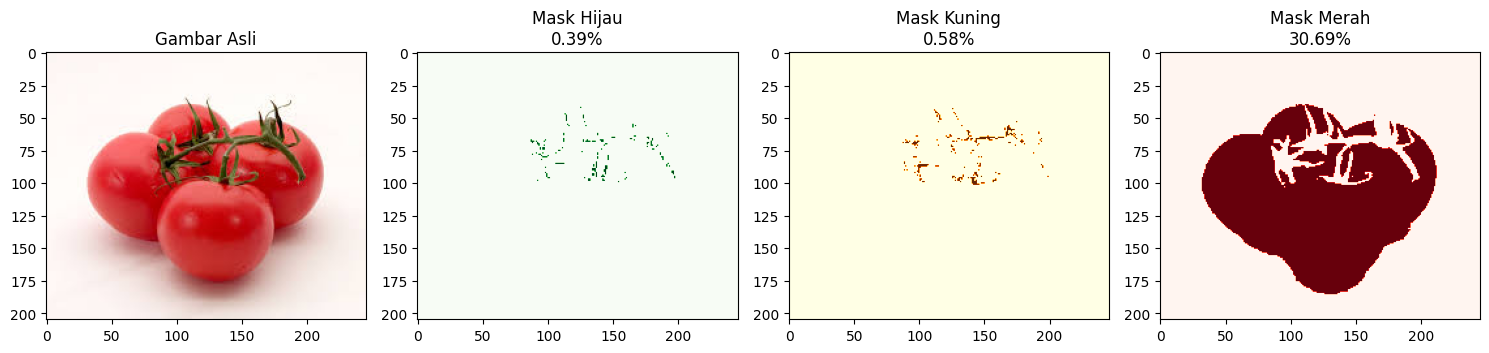

Persentase Hijau: 0.39%
Persentase Kuning: 0.58%
Persentase Merah: 30.69%
Tingkat kematangan tomat: Matang (Merah)


In [ ]:

# Import library
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Fungsi untuk deteksi warna kematangan
def detect_ripeness_with_percentage(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB

    # Konversi ke HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Rentang warna untuk masing-masing kematangan
    # Hijau (belum matang)
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    # Kuning (setengah matang)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([35, 255, 255])

    # Merah (matang)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Masker warna
    mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask_red = mask_red1 | mask_red2

    # Hitung jumlah piksel untuk setiap warna
    total_pixels = image.shape[0] * image.shape[1]
    green_pixels = np.sum(mask_green > 0)
    yellow_pixels = np.sum(mask_yellow > 0)
    red_pixels = np.sum(mask_red > 0)

    # Hitung persentase
    green_percentage = (green_pixels / total_pixels) * 100
    yellow_percentage = (yellow_pixels / total_pixels) * 100
    red_percentage = (red_pixels / total_pixels) * 100

    # Tentukan tingkat kematangan berdasarkan piksel dominan
    if red_pixels > yellow_pixels and red_pixels > green_pixels:
        ripeness = "Matang (Merah)"
    elif yellow_pixels > green_pixels:
        ripeness = "Setengah Matang (Kuning)"
    else:
        ripeness = "Belum Matang (Hijau)"

    # Visualisasi hasil
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title("Gambar Asli")

    plt.subplot(1, 4, 2)
    plt.imshow(mask_green, cmap='Greens')
    plt.title(f"Mask Hijau\n{green_percentage:.2f}%")

    plt.subplot(1, 4, 3)
    plt.imshow(mask_yellow, cmap='YlOrBr')
    plt.title(f"Mask Kuning\n{yellow_percentage:.2f}%")

    plt.subplot(1, 4, 4)
    plt.imshow(mask_red, cmap='Reds')
    plt.title(f"Mask Merah\n{red_percentage:.2f}%")

    plt.tight_layout()
    plt.show()

    # Tampilkan hasil persentase
    print(f"Persentase Hijau: {green_percentage:.2f}%")
    print(f"Persentase Kuning: {yellow_percentage:.2f}%")
    print(f"Persentase Merah: {red_percentage:.2f}%")

    return ripeness


# Unggah gambar di Google Colab
print("Silakan unggah gambar tomat Anda:")
uploaded = files.upload()
image_path = next(iter(uploaded))

# Deteksi tingkat kematangan
ripeness = detect_ripeness_with_percentage(image_path)
print(f"Tingkat kematangan tomat: {ripeness}")